In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install numpy matplotlib seaborn tqdm

In [ ]:
data = pd.read_csv("/content/data (2).csv")

In [ ]:
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [ ]:
data.shape

(170653, 19)

In [ ]:
data.isna().sum()

,0
valence,0
year,0
acousticness,0
artists,0
danceability,0
duration_ms,0
energy,0
explicit,0
id,0
instrumentalness,0


In [ ]:
data = data.dropna()

100%|██████████| 13/13 [00:51<00:00,  3.93s/it]


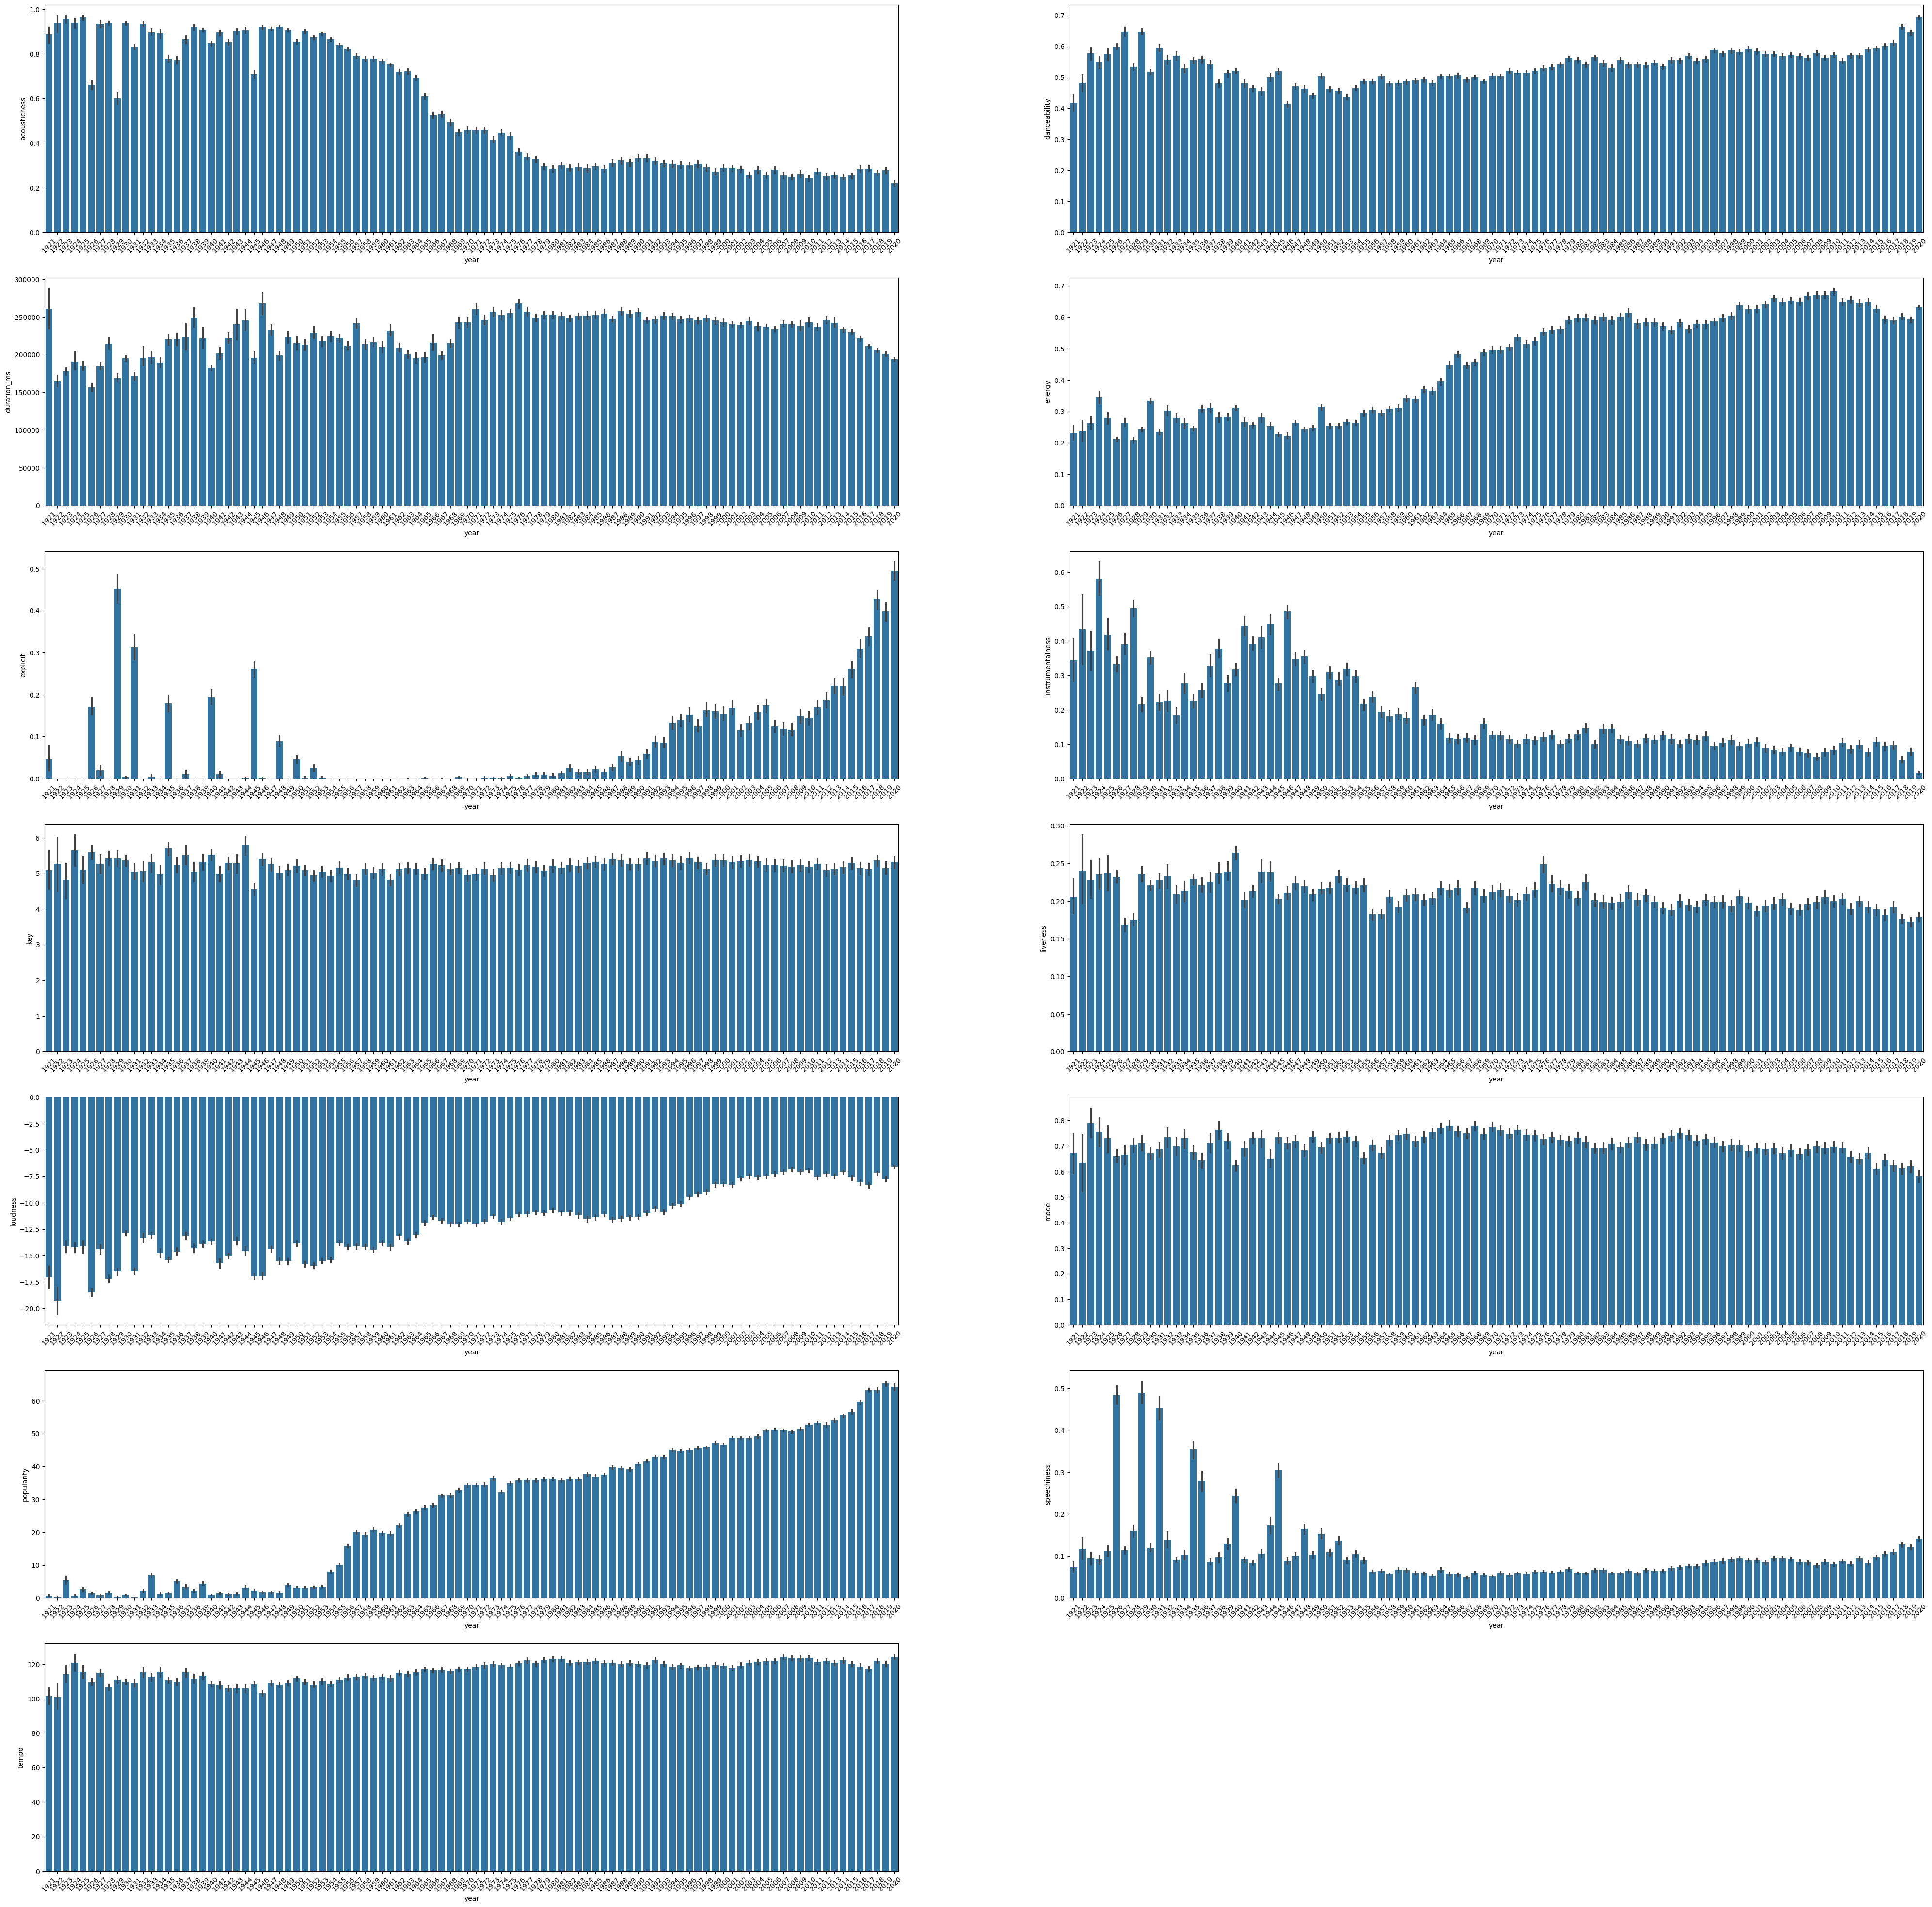

In [ ]:
viz_data = data.drop(columns=['id', 'name', 'artists', 'release_date', 'year'])

plt.figure(figsize=(50, 50))
for i in tqdm(np.arange(1, len(viz_data.columns))):
    plt.subplot(7, 2, i)
    sns.barplot(x=data.year,y=viz_data[viz_data.columns[i]])
    plt.xticks(rotation=45);
plt.show()

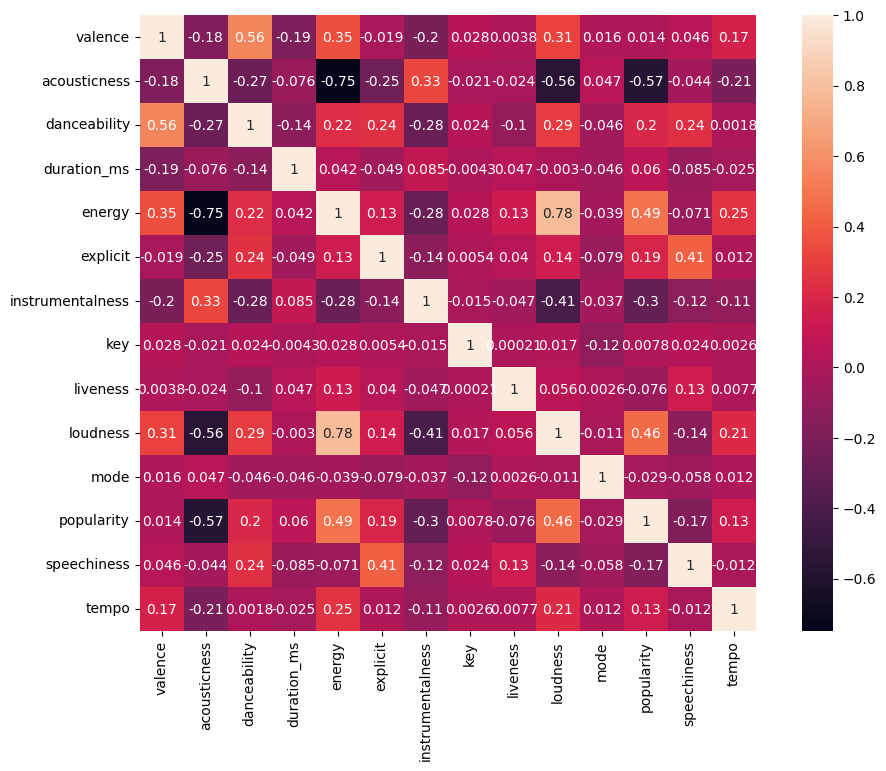

In [ ]:
plt.subplots(figsize=(12, 8))
sns.heatmap(viz_data.corr(), annot=True, square=True)
plt.show()

In [ ]:
data.head(2)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936


In [ ]:
def normalize_column(col):
    max_d = data[col].max()
    min_d = data[col].min()
    data[col] = (data[col] - min_d)/(max_d - min_d)

In [ ]:
num_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = data.select_dtypes(include=num_types)

for col in num.columns:
    normalize_column(col)

In [ ]:
data.head(3)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,0.0,0.985944,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.282389,0.153112,0.211,0.0,4BJqT0PrAfrxzMOxytFOIz,0.878,0.909091,0.665,0.624916,1.0,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",0.04,1921,0.037732,0.332450
1,0.9630,0.0,0.734940,['Dennis Day'],0.828947,0.032496,0.341,0.0,7xPhfUan2yNtyFG0cUWkt8,0.000,0.636364,0.160,0.744797,1.0,Clancy Lowered the Boom,0.05,1921,0.427835,0.250243
2,0.0394,0.0,0.964859,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.331984,0.091685,0.166,0.0,1o6I8BglA6ylDMrIELygv1,0.913,0.272727,0.101,0.707071,1.0,Gati Bali,0.05,1921,0.034948,0.453125


In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=10)
cat = km.fit_predict(num)
data['cat'] = cat
normalize_column('cat')

In [ ]:
data.cat[:10]

,cat
0,0.666667
1,0.333333
2,0.111111
3,0.000000
4,0.333333
5,0.444444
6,0.333333
7,0.000000
8,0.333333
9,0.000000


In [ ]:
caya=data[data.name=='Come As You Are']
caya.head(3)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,cat
13809,0.539,0.707071,0.000161,['Nirvana'],0.506073,0.039607,0.824,0.0,4P5KoWXOxwuobLmHXLMobV,0.001610,0.363636,0.0916,0.848078,0.0,Come As You Are,0.72,1991-09-26,0.040000,0.493312,0.000000
33322,0.568,0.737374,0.556225,['Nirvana'],0.691296,0.046088,0.766,0.0,3sYWyVGfPuit80szWXhrRA,0.003460,0.454545,0.0815,0.802866,0.0,Come As You Are,0.64,1994-11-01,0.042268,0.489473,0.777778
37456,0.153,0.939394,0.639558,['Crowder'],0.462551,0.052727,0.362,0.0,6iha1ZUpCGUJrrQLDSFYux,0.000028,0.000000,0.1050,0.801143,1.0,Come As You Are,0.59,2014-01-01,0.028763,0.553721,0.777778


In [ ]:
class SpotifyRecommender():
    def __init__(self, rec_data):
        self.rec_data_ = rec_data

    def change_data(self, rec_data):
        self.rec_data_ = rec_data

    def get_recommendations(self, song_name, amount=1):
        distances = []
        song_matches = self.rec_data_[(self.rec_data_.name.str.lower() == song_name.lower())]

        if song_matches.empty:
            print("No matching songs found.")
            return

        song = song_matches.head(1).values[0]
        res_data = self.rec_data_[self.rec_data_.name.str.lower() != song_name.lower()]

        for r_song in tqdm(res_data.values):
            dist = 0
            for col in np.arange(len(res_data.columns)):
                if not col in [1, 3, 8, 14, 16]:  # Exclude non-numerical columns
                    try:
                        dist = dist + np.absolute(float(song[col]) - float(r_song[col]))
                    except ValueError:
                        continue  # Skip non-numeric columns
            distances.append(dist)

        res_data['distance'] = distances
        res_data = res_data.sort_values('distance')
        columns = ['artists', 'name']
        return res_data[columns][:amount]

In [ ]:
recommender = SpotifyRecommender(data)

In [ ]:
recommender.get_recommendations('The Wearing of the Green', 5)

100%|██████████| 170652/170652 [00:08<00:00, 20954.59it/s]


,artists,name
110690,['Lata Mangeshkar'],Ek Dil Ka Lagana
95189,['Mabel Mercer'],Remind Me
125715,['Himangshu Dutta'],Sahab Tum Sab Lachak Chokho
41783,['Carlo Buti'],Ci-ciu-ci cantava un usignolo
22589,['Billie Holiday'],The Same Old Story - Take 1


In [ ]:
recommender.get_recommendations('First Love',5)

100%|██████████| 170649/170649 [00:07<00:00, 21440.22it/s]


,artists,name
116299,['Eric Clapton'],Peaches And Diesel
132227,['Eric Clapton'],Peaches And Diesel
134851,['The Breeders'],Doe
9157,['The Beatles'],Flying - Remastered 2009
145766,['James Gang'],Asshtonpark
